# KNearestNeighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\learning\\Python\\UdemyNotes\\Refactored_Py_DS_ML_Bootcamp-master\\14-K-Nearest-Neighbors\\KNN_Project_Data.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [4]:
df.head(3)


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1


## Data Preparation


In [6]:
from sklearn.preprocessing  import StandardScaler
# scaler converte the values in your column to Z score or standard value

In [7]:
X = df.drop('TARGET CLASS',axis = 1)

In [8]:
sc = StandardScaler()


In [9]:
Zscale = sc.fit(X).transform(X)


In [10]:
df_sc = pd.DataFrame(data=Zscale,columns = X.columns[:])


In [11]:
df_sc.head(3)


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = df_sc
y = df['TARGET CLASS']


In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [15]:
X_train.shape


(670, 10)

In [16]:
y_train.shape


(670,)

## Create Model


In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [18]:
k = int(np.sqrt(y_train.count()))
# theoretical best k value selection 

In [19]:
k


25

In [20]:
knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')


In [21]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)


In [23]:
sum(pred != y_test)


58

In [24]:
print(knn.effective_metric_)
print(knn.leaf_size)
print(knn.n_neighbors)


euclidean
30
25


In [25]:
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 25,
 'p': 2,
 'weights': 'uniform'}

In [26]:
#this method is used to prepare a plot for K value vs its errors
err_num = []
err_mean = []
for i in range(1,50):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred = kn.predict(X_test)
    err_num.append(sum( pred != y_test )) # we can use either the sum or mean to plot , both have the same path
    err_mean.append(np.mean( pred != y_test ))

Text(0.5, 1.0, 'Error number vs K')

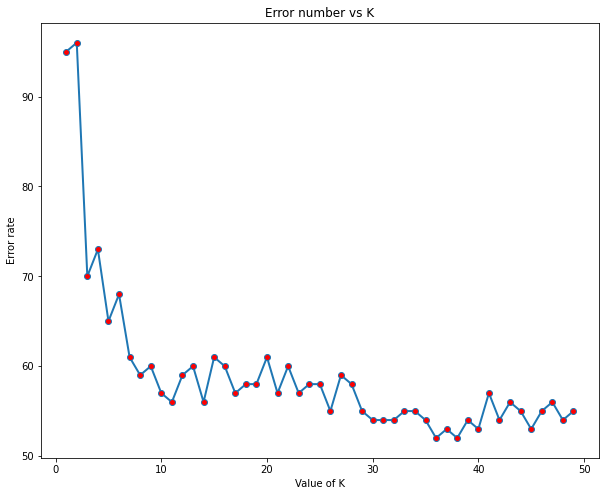

In [27]:
#plot with total number of errors vs K
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,50),err_num,linestyle='-',lw=2,marker='o',ms=6,mfc='red')
plt.xlabel('Value of K')
plt.ylabel('Error rate')
plt.title('Error number vs K')

Text(0.5, 1.0, 'Error mean vs K')

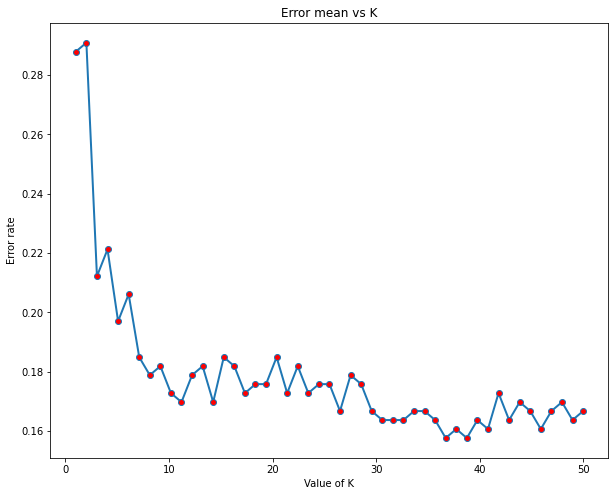

In [28]:
#plot with total mean of errors vs K
plt.figure(figsize=(10,8))
plt.plot(np.linspace(1,50,49),err_mean,linestyle='-',lw=2,marker='o',ms=6,mfc='red')
plt.xlabel('Value of K')
plt.ylabel('Error rate')
plt.title('Error mean vs K')

## Accuracy and reports


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
# for k = 25
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.84      0.83      0.84       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[135  27]
 [ 28 140]]


In [32]:
# for k =36 
knn1 = KNeighborsClassifier(n_neighbors=36)
knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)

In [33]:
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       162
           1       0.85      0.85      0.85       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

[[136  26]
 [ 26 142]]
